# Week 10 Hand-in

## Assignment

## Exercise meanshift
https://github.com/Hartmannsolution/docker_notebooks/blob/master/notebooks/10-1%20Clustering%20With%20MeanShift.ipynb

## Status

Alle opgaver er lavet

# Imports

In [2]:
import pandas as pd
from sklearn import preprocessing
import sklearn.linear_model
import seaborn as sb
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle
from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn.datasets import make_blobs

# Solution for ex 1

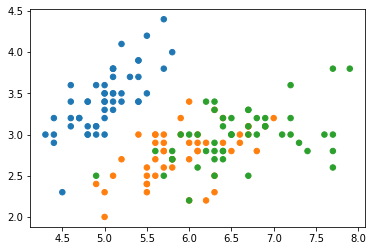

In [3]:
#1. load 'data/iris_data.csv' into a dataframe (use decimal=',') and remove the 2 `Petal` columns. Now we are left with a 2D feature space
data = '../data/iris_data.csv'
df = pd.read_csv(data, decimal=',')
df.drop(['Petal length', 'Petal width'], 'columns', inplace=True)
#2. get unique labels (Species column)
species = np.unique(df['Species'])
#3. plot with a scatter plot each iris flower sample colored by label (3 different colors)

plt.figure()
for spec in species:
    plt.scatter(df['Sepal length'], df['Sepal width'], s= (df['Species'] == spec)*30)

In [4]:
#4. use: `MeanShift` and `estimate_bandwidth` from `sklearn.cluster` to first estimate bandwidth and then get the clusters 
df.drop(['Species'], 'columns', inplace=True)
bw = estimate_bandwidth(df, quantile=0.20)
analyzer = MeanShift(bandwidth=bw)
analyzer.fit(df)
centers = analyzer.cluster_centers_
labels = analyzer.labels_
n_clusters = len(np.unique(labels))
#5. print out labels, cluster centers and number of clusters (as returned from the MeanShift function)
print('labels:',np.unique(labels))
print('cluster centers:',centers)
print('number of clusters:', len(np.unique(labels)))

labels: [0 1 2]
cluster centers: [[6.08727273 2.90181818]
 [5.         3.37692308]
 [7.6        3.73333333]]
number of clusters: 3


Text(0.5, 1.0, 'Estimated number of clusters: 3')

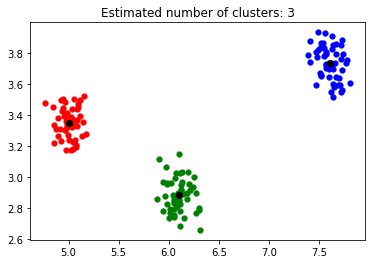

In [5]:
#5. create a new scatter plot where each flower is colored according to cluster label
data_2d, _ = make_blobs(n_samples=len(df), centers=centers, cluster_std=0.1)
analyzer.fit(data_2d)
centers = analyzer.cluster_centers_
labels = analyzer.labels_
n_clusters = len(np.unique(labels))

#6 Plot the clusters in different colors
fig = plt.figure()
ax = fig.add_subplot(111)

colors = cycle('bgrcmy')
for k, col in zip(range(n_clusters), colors):
    my_members = (labels == k)
    cluster_center = centers[k]
    
    x, y = data_2d[my_members,0], data_2d[my_members,1]
    ax.scatter(x, y, c=col, linewidth=0.2)
    #7. add a dot for the cluster centers
    ax.scatter(cluster_center[0], cluster_center[1], c='k', s=50, linewidth=0.2)
    
plt.title('Estimated number of clusters: {}'.format(n_clusters))
#8. Compare the 2 plots (colored by actual labels vs. colored by cluster label)
#Looking at the plots, it looks like it fits with the cluster centers, although i would say that label no. 3 does not look like it should be clustered. Not sure

#9. Try changing the 'quantile' argument to 0.15 and see what happens to your cluster plot.